# Importing required libraries

First of all, we will be importing required libraries such as pandas, matplotlib, seaborn etc that are neede in our preprocessing and analysis task

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt   
from matplotlib.pyplot import pie


# Reading the large csv files into the dataframe

There are two ways we can read the csv into a dataframe. One is by reading the csv files directly using read_csv and the other is using with statement to open the file manually and read it's contents. While read_csv is simpler and is more convenient way to perform the task, it is time consuming when comes to a large file. In this implementation, I have first opened thefile using with statement and then load the file to a dataframe using read_csv.

Note: After the file is loaded into the dataframe, I have deleted the LCA_CASE_NUMBER field immediately as it may contain sensitive information and have created a new ID field for each of the dataframe. Another way would be to mask the column data.

In [2]:

# Reading 2014 data into dataframe
with open('H-1B_FY14_Q4.csv', encoding="latin1") as f:
    df_2014 = pd.read_csv(f)
#Dropping CASE NUMBER field as it contains sensitive data and adding new id field
df_2014.drop("LCA_CASE_NUMBER",1,inplace=True)
df_2014.insert(0, 'ID', ['2014_' + str(i) for i in range(1, len(df_2014)+1)])



    
# Reading 2015 data into dataframe
with open('H-1B_Disclosure_Data_FY15_Q4.csv', encoding="latin1") as f:
    df_2015 = pd.read_csv(f)
#Dropping CASE NUMBER field as it contains sensitive data and adding new id field
df_2015.drop("CASE_NUMBER",1,inplace=True)
df_2015.insert(0, 'ID', ['2015_' + str(i) for i in range(1, len(df_2015)+1)])



# Reading 2016 data into dataframe
with open('H-1B_Disclosure_Data_FY16.csv', encoding="latin1") as f:
    df_2016 = pd.read_csv(f)
#Dropping CASE NUMBER field as it contains sensitive data and adding new id field
df_2016.drop("CASE_NUMBER",1,inplace=True)
df_2016.insert(0, 'ID', ['2016_' + str(i) for i in range(1, len(df_2016)+1)])



C:\Users\sures\AppData\Local\Temp\ipykernel_19396\1227026343.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_2014.drop("LCA_CASE_NUMBER",1,inplace=True)
C:\Users\sures\AppData\Local\Temp\ipykernel_19396\1227026343.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_2015.drop("CASE_NUMBER",1,inplace=True)
C:\Users\sures\AppData\Local\Temp\ipykernel_19396\1227026343.py:22: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2016 = pd.read_csv(f)
C:\Users\sures\AppData\Local\Temp\ipykernel_19396\1227026343.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_2016.drop("CASE_NUMBER",1,inplace=True)


### Analyzing 2014 file

Once the files for each year are loaded into the dataframe, the next step would be to go through the contents of each dataframe.

In [3]:
# Print all columns in the DataFrame
for col in df_2014.columns:
    print(col)

ID
STATUS
LCA_CASE_SUBMIT
DECISION_DATE
VISA_CLASS
LCA_CASE_EMPLOYMENT_START_DATE
LCA_CASE_EMPLOYMENT_END_DATE
LCA_CASE_EMPLOYER_NAME
LCA_CASE_EMPLOYER_ADDRESS
LCA_CASE_EMPLOYER_CITY
LCA_CASE_EMPLOYER_STATE
LCA_CASE_EMPLOYER_POSTAL_CODE
LCA_CASE_SOC_CODE
LCA_CASE_SOC_NAME
LCA_CASE_JOB_TITLE
LCA_CASE_WAGE_RATE_FROM
LCA_CASE_WAGE_RATE_TO
LCA_CASE_WAGE_RATE_UNIT
FULL_TIME_POS
TOTAL_WORKERS
LCA_CASE_WORKLOC1_CITY
LCA_CASE_WORKLOC1_STATE
PW_1
PW_UNIT_1
PW_SOURCE_1
OTHER_WAGE_SOURCE_1
YR_SOURCE_PUB_1
LCA_CASE_WORKLOC2_CITY
LCA_CASE_WORKLOC2_STATE
PW_2
PW_UNIT_2
PW_SOURCE_2
OTHER_WAGE_SOURCE_2
YR_SOURCE_PUB_2
LCA_CASE_NAICS_CODE


In [4]:
# Let's see some sample data from the dataframe
df_2014.sample(5)

,ID,STATUS,LCA_CASE_SUBMIT,DECISION_DATE,VISA_CLASS,LCA_CASE_EMPLOYMENT_START_DATE,LCA_CASE_EMPLOYMENT_END_DATE,LCA_CASE_EMPLOYER_NAME,LCA_CASE_EMPLOYER_ADDRESS,LCA_CASE_EMPLOYER_CITY,...,OTHER_WAGE_SOURCE_1,YR_SOURCE_PUB_1,LCA_CASE_WORKLOC2_CITY,LCA_CASE_WORKLOC2_STATE,PW_2,PW_UNIT_2,PW_SOURCE_2,OTHER_WAGE_SOURCE_2,YR_SOURCE_PUB_2,LCA_CASE_NAICS_CODE
298402,2014_298403,CERTIFIED,3/20/2014,3/28/2014,H-1B,9/6/2014,9/6/2017,"TRICOLOR AUTO GROUP, LLC",545 E JOHN W CARPENTER FWY #1900,IRVING,...,WWW.FLCDATACENTER.COM,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441120.0
185850,2014_185851,CERTIFIED,2/25/2014,3/3/2014,H-1B,8/26/2014,8/26/2017,"PEGASUS KNOWLEDGE SOLUTIONS, INC.",1111 PLAZA DRIVE SUITE 790,SCHAUMBURG,...,OFLC ONLINE DATA CENTRE,2013.0,WAUKEGAN,IL,50128.0,Year,OES,OFLC ONLINE DATA CENTRE,OFLC ONLINE DATA CENTRE,541511.0
392789,2014_392790,CERTIFIED,5/29/2014,6/4/2014,H-1B,10/1/2014,9/30/2017,IBM INDIA PRIVATE LIMITED,3039 E. CORNWALLIS ROAD,DURHAM,...,OFLC ONLINE DATACENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541510.0
29679,2014_29680,CERTIFIED,9/26/2013,11/1/2013,H-1B,10/1/2013,9/30/2016,AMAZON CORPORATE LLC,535 TERRY AVENUE NORTH,SEATTLE,...,OFLC ONLINE DATA CENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,454111.0
158092,2014_158093,CERTIFIED,2/13/2014,2/21/2014,H-1B,8/11/2014,8/9/2017,INFOSYS LIMITED,6100 TENNYSON PARKWAY,PLANO,...,OFLC ONLINE DATA CENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541511.0


### Analyzing 2015 file

Let's do the same for 2015 file

In [5]:
# Print all columns in the DataFrame
for col in df_2015.columns:
    print(col)

ID
CASE_STATUS
CASE_SUBMITTED
DECISION_DATE
VISA_CLASS
EMPLOYMENT_START_DATE
EMPLOYMENT_END_DATE
EMPLOYER_NAME
EMPLOYER_ADDRESS1
EMPLOYER_ADDRESS2
EMPLOYER_CITY
EMPLOYER_STATE
EMPLOYER_POSTAL_CODE
EMPLOYER_COUNTRY
EMPLOYER_PROVINCE
EMPLOYER_PHONE
EMPLOYER_PHONE_EXT
AGENT_ATTORNEY_NAME
AGENT_ATTORNEY_CITY
AGENT_ATTORNEY_STATE
JOB_TITLE
SOC_CODE
SOC_NAME
NAIC_CODE
TOTAL WORKERS
FULL_TIME_POSITION
PREVAILING_WAGE
PW_UNIT_OF_PAY
PW_WAGE_LEVEL
PW_WAGE_SOURCE
PW_WAGE_SOURCE_YEAR
PW_WAGE_SOURCE_OTHER
WAGE_RATE_OF_PAY
WAGE_UNIT_OF_PAY
H-1B_DEPENDENT
WILLFUL VIOLATOR
WORKSITE_CITY
WORKSITE_COUNTY
WORKSITE_STATE
WORKSITE_POSTAL_CODE


In [6]:
# Some sample data for 2015 file
df_2015.sample(5)

,ID,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,...,PW_WAGE_SOURCE_YEAR,PW_WAGE_SOURCE_OTHER,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE
291762,2015_291763,CERTIFIED,3/10/2015,3/16/2015,H-1B,09/08/2015,09/08/2018,VIRTUSA CORPORATION,2000 WEST PARK DRIVE,STE. 300,...,2015.0,OFLC ONLINE DATA CENTER,80995 -,Year,Y,N,NEW YORK,NEW YORK,NY,10005
70461,2015_70462,CERTIFIED,11/12/2014,11/18/2014,H-1B,11/12/2014,11/12/2017,BUSINESS INTELLI SOLUTIONS INC,4100 SPRING VALLEY RD,SUITE # 205,...,2014.0,OFLC ONLINE DATA CENTER,50565 -,Year,Y,N,"EDINA,",HENNEPIN,MN,55435
459062,2015_459063,CERTIFIED,5/15/2015,5/21/2015,H-1B,06/01/2015,05/31/2018,"PERCEPTRON, INC.",47827 HALYARD DRIVE,NaN,...,2015.0,OFLC ONLINE DATA CENTER,118000 -,Year,N,N,PLYMOUTH,WAYNE,MI,48170
577358,2015_577359,CERTIFIED,8/31/2015,9/5/2015,H-1B,09/10/2015,09/09/2018,"ORACLE FINANCIAL SERVICES SOFTWARE, INC.",399 THORNALL STREET,NaN,...,2015.0,RADFORD GLOBAL TECHNOLOGY SURVEY,100410 - 139132,Year,N,N,NORWALK,FAIRFIELD,CT,06850
145515,2015_145516,CERTIFIED-WITHDRAWN,1/29/2015,2/25/2015,H-1B,07/14/2015,07/14/2018,"TECH MAHINDRA (AMERICAS), INC.",4965 PRESTON PARK BOULEVARD,SUITE 500,...,2014.0,OFLC ONLINE DATA CENTER,110000 -,Year,Y,N,NEW ALBANY,FRANKLIN,OH,43054


### Analyzing 2016 file

Let's do the same for 2016 file

In [7]:
# Print all columns in the DataFrame
for col in df_2016.columns:
    print(col)

ID
CASE_STATUS
CASE_SUBMITTED
DECISION_DATE
VISA_CLASS
EMPLOYMENT_START_DATE
EMPLOYMENT_END_DATE
EMPLOYER_NAME
EMPLOYER_ADDRESS
EMPLOYER_CITY
EMPLOYER_STATE
EMPLOYER_POSTAL_CODE
EMPLOYER_COUNTRY
EMPLOYER_PROVINCE
EMPLOYER_PHONE
EMPLOYER_PHONE_EXT
AGENT_ATTORNEY_NAME
AGENT_ATTORNEY_CITY
AGENT_ATTORNEY_STATE
JOB_TITLE
SOC_CODE
SOC_NAME
NAIC_CODE
TOTAL_WORKERS
FULL_TIME_POSITION
PREVAILING_WAGE
PW_UNIT_OF_PAY
PW_WAGE_SOURCE
PW_SOURCE_YEAR
PW_SOURCE_OTHER
WAGE_RATE_OF_PAY_FROM
WAGE_RATE_OF_PAY_TO
WAGE_UNIT_OF_PAY
H-1B_DEPENDENT
WILLFUL_VIOLATOR
WORKSITE_CITY
WORKSITE_COUNTY
WORKSITE_STATE
WORKSITE_POSTAL_CODE
ORIGINAL_CERT_DATE


In [8]:
# Some sample data for 2016 file
df_2016.sample(5)

,ID,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
143414,2016_143415,CERTIFIED,3/14/2016,3/18/2016,H-1B,9/13/2016,9/12/2019,NORTH DOME SOLUTIONS,"21135 WHITFIELD PLACE, SUITE # 207",STERLING,...,"63,814.00",0,Year,Y,N,STERLING,LOUDOUN,VA,20165,NaN
373019,2016_373020,CERTIFIED,5/16/2016,5/20/2016,H-1B,5/17/2016,5/16/2019,RITE PROS INC,415 CONGRESS ST,PORTLAND,...,"75,000.00",0,Year,Y,N,BOSTON,SUFFOLK,MA,2210,NaN
250091,2016_250092,CERTIFIED,3/17/2016,3/23/2016,H-1B,7/20/2016,7/19/2019,"SEAL CONSULTING, INC.",105 FIELDCREST AVENUE,EDISON,...,"60,000.00","105,000.00",Year,Y,N,ST. LOUIS,SAINT LOUIS,MO,63167,NaN
164989,2016_164990,CERTIFIED,4/29/2016,5/5/2016,H-1B,5/23/2016,5/23/2019,"RJT COMPUQUEST, INC.",222 N SEPULVEDA BLVD.,EL SEGUNDO,...,"65,000.00",0,Year,Y,N,SAN DIEGO,SAN DIEGO,CA,92121,NaN
374406,2016_374407,CERTIFIED,5/25/2016,6/1/2016,H-1B,5/25/2016,5/25/2019,TRIBRIDGE HOLDINGS LLC,4830 WEST KENNEDY BLVD.,TAMPA,...,"103,680.00",0,Year,N,N,PLANO,COLLIN,TX,75024,NaN


After listing the columns and the seeing some data in these files, we can see that the data is stored in a slightly different way for each of these years. The columns present in these files are not consistent and the data they contain are also in a different format such as date and wage range. The next step is to select a list of colum  we want to perform analysis on, rename them to make the names consistent across the files and merge them into a single dataframe before we do our preprocessing and data cleaning.

# Merging 2014, 2015 and 2016 data

First let's select the columns that might be required in our analysis, rename them to make the names consistent and merge them into a single file.

In [9]:
# Rename 2014 dataframe columns
h1b_2014 = df_2014.loc[:, ['ID', 'STATUS', 'LCA_CASE_SUBMIT','DECISION_DATE', 'VISA_CLASS','LCA_CASE_EMPLOYMENT_START_DATE', 'LCA_CASE_EMPLOYMENT_END_DATE', 'LCA_CASE_EMPLOYER_NAME', 'LCA_CASE_EMPLOYER_STATE', 'LCA_CASE_JOB_TITLE', 'LCA_CASE_WAGE_RATE_FROM', 'LCA_CASE_WAGE_RATE_TO','LCA_CASE_WAGE_RATE_UNIT', 'LCA_CASE_WORKLOC1_STATE', 'PW_1', 'PW_UNIT_1']].rename(columns={'LCA_CASE_SUBMIT': 'CASE_SUBMIT_DATE', 'LCA_CASE_EMPLOYMENT_START_DATE' :'EMP_START_DATE', 'LCA_CASE_EMPLOYMENT_END_DATE':'EMP_END_DATE', 'LCA_CASE_EMPLOYER_NAME':'EMP_NAME', 'LCA_CASE_EMPLOYER_STATE':'EMP_STATE','LCA_CASE_JOB_TITLE':'JOB_TITLE','LCA_CASE_WAGE_RATE_FROM':'WAGE_RATE_FROM','LCA_CASE_WAGE_RATE_TO':'WAGE_RATE_TO','LCA_CASE_WAGE_RATE_UNIT':'WAGE_RATE_UNIT', 'LCA_CASE_WORKLOC1_STATE':'WORKSITE_STATE','PW_1':'BASE_PAY', 'PW_UNIT_1':'BASE_PAY_UNIT'})

# Rename 2015 dataframe columns
h1b_2015 = df_2015.loc[:, ['ID', 'CASE_STATUS', 'CASE_SUBMITTED','DECISION_DATE','VISA_CLASS','EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME', 'EMPLOYER_STATE', 'JOB_TITLE', 'WAGE_RATE_OF_PAY', 'WAGE_UNIT_OF_PAY', 'WORKSITE_STATE', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY']].rename(columns={'CASE_STATUS': 'STATUS', 'CASE_SUBMITTED':'CASE_SUBMIT_DATE', 'EMPLOYMENT_START_DATE':'EMP_START_DATE','EMPLOYMENT_END_DATE':'EMP_END_DATE', 'EMPLOYER_NAME':'EMP_NAME', 'EMPLOYER_STATE':'EMP_STATE', 'WAGE_RATE_OF_PAY':'WAGE_RATE', 'WAGE_UNIT_OF_PAY':'WAGE_RATE_UNIT', 'PREVAILING_WAGE':'BASE_PAY', 'PW_UNIT_OF_PAY':'BASE_PAY_UNIT'})

# The year 2015 has wage range in a singloe column seperaetd by -. Let's split them into tow columns
h1b_2015[['WAGE_RATE_FROM', 'WAGE_RATE_TO']] = h1b_2015['WAGE_RATE'].str.split(' - ', expand=True)
h1b_2015['WAGE_RATE_FROM'] = h1b_2015['WAGE_RATE_FROM'].str.replace('-', '')
h1b_2015['WAGE_RATE_TO'] = h1b_2015['WAGE_RATE_TO'].str.replace('-', '')
# remove the original column
h1b_2015.drop(columns=['WAGE_RATE'], inplace=True)

# Rename 2015 dataframe columns
h1b_2016 = df_2016.loc[:, ['ID', 'CASE_STATUS', 'CASE_SUBMITTED','DECISION_DATE','VISA_CLASS','EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME', 'EMPLOYER_STATE', 'JOB_TITLE', 'WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY', 'WORKSITE_STATE', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY']].rename(columns={'CASE_STATUS': 'STATUS', 'CASE_SUBMITTED':'CASE_SUBMIT_DATE', 'EMPLOYMENT_START_DATE':'EMP_START_DATE','EMPLOYMENT_END_DATE':'EMP_END_DATE', 'EMPLOYER_NAME':'EMP_NAME', 'EMPLOYER_STATE':'EMP_STATE', 'WAGE_RATE_OF_PAY_FROM':'WAGE_RATE_FROM','WAGE_RATE_OF_PAY_TO':'WAGE_RATE_TO', 'WAGE_UNIT_OF_PAY':'WAGE_RATE_UNIT', 'PREVAILING_WAGE':'BASE_PAY', 'PW_UNIT_OF_PAY':'BASE_PAY_UNIT'})

Let's add another column in each of those files indicating which year are those data from. This data will be stored in a column named YEAR in the dataframes. After that we will merge these dataframes using pd.concat and store them as a new dataframe named result.

In [10]:
# Add a new column 'YEAR' to h1b_2014 and set the values to 2014
h1b_2014['YEAR'] = 2014

# Add a new column 'YEAR' to h1b_2015 and set the values to 2015
h1b_2015['YEAR'] = 2015

# Add a new column 'YEAR' to h1b_2016 and set the values to 2016
h1b_2016['YEAR'] = 2016

# Store the result as a new dataframe named result
result = pd.concat([h1b_2014, h1b_2015, h1b_2016])

# Analyzing the result dataframe

In [11]:
# Print all columns in the DataFrame
for col in result.columns:
    print(col)

ID
STATUS
CASE_SUBMIT_DATE
DECISION_DATE
VISA_CLASS
EMP_START_DATE
EMP_END_DATE
EMP_NAME
EMP_STATE
JOB_TITLE
WAGE_RATE_FROM
WAGE_RATE_TO
WAGE_RATE_UNIT
WORKSITE_STATE
BASE_PAY
BASE_PAY_UNIT
YEAR


In [12]:
# Sample records
result.sample(5)

,ID,STATUS,CASE_SUBMIT_DATE,DECISION_DATE,VISA_CLASS,EMP_START_DATE,EMP_END_DATE,EMP_NAME,EMP_STATE,JOB_TITLE,WAGE_RATE_FROM,WAGE_RATE_TO,WAGE_RATE_UNIT,WORKSITE_STATE,BASE_PAY,BASE_PAY_UNIT,YEAR
356736,2016_356737,CERTIFIED,3/22/2016,3/28/2016,H-1B,9/15/2016,9/15/2019,TEK AND COMPANY,GA,SOFTWARE DEVELOPER,"62,000.00",0,Year,GA,"57,325.00",Year,2016
386046,2016_386047,CERTIFIED,7/11/2016,7/15/2016,H-1B,8/12/2016,8/12/2019,GOORIN BROS INC.,CA,DATABASE DEVELOPER,"92,000.00",0,Year,CA,"80,184.00",Year,2016
99539,2016_99540,CERTIFIED,1/4/2016,1/8/2016,H-1B,4/11/2016,4/11/2019,"TYCO ELECTRONICS CORPORATION, A TE CONNECTIVIT...",PA,IT DATA ANALYST,"90,000.00","105,000.00",Year,PA,"86,445.00",Year,2016
226228,2015_226229,CERTIFIED,2/27/2015,3/9/2015,H-1B,08/27/2015,08/26/2018,DELL USA L.P.,TX,SALES SUPPORT SR. ADVISOR,94000,None,Year,TX,78697.0,Year,2015
241356,2016_241357,CERTIFIED,3/11/2016,3/17/2016,H-1B,9/10/2016,9/10/2019,"AGILITY TECHNOLOGIES, LLC",GA,PROGRAMMER ANALYST,"65,000.00",0,Year,NH,"39,541.00",Year,2016


Now I have merged three dataframes into a single one with a consistent column names. I can see from the sample records that thedata stored are incinsistent and needs to be preprocessed and cleaned.

### Let's check the data types and make them consistent

In [13]:
# Printing the datatypes for each columns in the dataframe
print(result.dtypes)

ID                  object
STATUS              object
CASE_SUBMIT_DATE    object
DECISION_DATE       object
VISA_CLASS          object
EMP_START_DATE      object
EMP_END_DATE        object
EMP_NAME            object
EMP_STATE           object
JOB_TITLE           object
WAGE_RATE_FROM      object
WAGE_RATE_TO        object
WAGE_RATE_UNIT      object
WORKSITE_STATE      object
BASE_PAY            object
BASE_PAY_UNIT       object
YEAR                 int64
dtype: object


I can see that all of these columns are stored as an object data types. These needs to be consistent before doing any analysis on the data.

In [14]:
# Converting each of the columns to a suitable data types

result['ID'] = result['ID'].astype(str)
result['STATUS'] = result['STATUS'].astype('category')
result['CASE_SUBMIT_DATE'] = pd.to_datetime(result['CASE_SUBMIT_DATE'], errors='coerce')
result['DECISION_DATE'] = pd.to_datetime(result['DECISION_DATE'], errors='coerce')
result['VISA_CLASS'] = result['VISA_CLASS'].astype(str)
result['EMP_START_DATE'] = pd.to_datetime(result['EMP_START_DATE'], errors='coerce')
result['EMP_END_DATE'] = pd.to_datetime(result['EMP_END_DATE'], errors='coerce')
result['EMP_NAME'] = result['EMP_NAME'].astype(str)
result['EMP_STATE'] = result['EMP_STATE'].astype(str)
result['JOB_TITLE'] = result['JOB_TITLE'].astype(str)
result['WAGE_RATE_FROM'] = pd.to_numeric(result['WAGE_RATE_FROM'].str.strip(), errors='coerce')
result['WAGE_RATE_TO'] = pd.to_numeric(result['WAGE_RATE_TO'].str.strip(), errors='coerce')
result['WORKSITE_STATE'] = result['WORKSITE_STATE'].astype(str)
result['BASE_PAY'] = pd.to_numeric(result['BASE_PAY'].astype(str).str.strip(), errors='coerce')
result['BASE_PAY_UNIT'] = result['BASE_PAY_UNIT'].astype(str)

C:\Users\sures\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sures\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/02/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sures\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/06/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sures\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/03/2015' in DD/MM/YYYY format. Provide format or specif

Now the data has been changed to suitable data types, let's check the type for each of these columns once again.

In [15]:
# Printing the datatypes for each columns in the dataframe
print(result.dtypes)

ID                          object
STATUS                    category
CASE_SUBMIT_DATE    datetime64[ns]
DECISION_DATE       datetime64[ns]
VISA_CLASS                  object
EMP_START_DATE      datetime64[ns]
EMP_END_DATE        datetime64[ns]
EMP_NAME                    object
EMP_STATE                   object
JOB_TITLE                   object
WAGE_RATE_FROM             float64
WAGE_RATE_TO               float64
WAGE_RATE_UNIT              object
WORKSITE_STATE              object
BASE_PAY                   float64
BASE_PAY_UNIT               object
YEAR                         int64
dtype: object


### Describing the dataframe 

In [16]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786160 entries, 0 to 647851
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   ID                object        
 1   STATUS            category      
 2   CASE_SUBMIT_DATE  datetime64[ns]
 3   DECISION_DATE     datetime64[ns]
 4   VISA_CLASS        object        
 5   EMP_START_DATE    datetime64[ns]
 6   EMP_END_DATE      datetime64[ns]
 7   EMP_NAME          object        
 8   EMP_STATE         object        
 9   JOB_TITLE         object        
 10  WAGE_RATE_FROM    float64       
 11  WAGE_RATE_TO      float64       
 12  WAGE_RATE_UNIT    object        
 13  WORKSITE_STATE    object        
 14  BASE_PAY          float64       
 15  BASE_PAY_UNIT     object        
 16  YEAR              int64         
dtypes: category(1), datetime64[ns](4), float64(3), int64(1), object(8)
memory usage: 233.4+ MB


In [17]:
# Print the summary including null values and unique values
summary = pd.concat([result.isnull().sum(), result.nunique()], axis=1)
summary.columns = ['null_values', 'unique_values']
print(summary)


                  null_values  unique_values
ID                          0        1786160
STATUS                      0              6
CASE_SUBMIT_DATE            0           2060
DECISION_DATE               0           1065
VISA_CLASS                  0              5
EMP_START_DATE             42           2316
EMP_END_DATE               49           2379
EMP_NAME                    0         145985
EMP_STATE                   0             57
JOB_TITLE                   0         186319
WAGE_RATE_FROM        1129203          49794
WAGE_RATE_TO          1141000          14501
WAGE_RATE_UNIT             76              5
WORKSITE_STATE              0             59
BASE_PAY               609376          34833
BASE_PAY_UNIT               0              6
YEAR                        0              3


Let's process and clean columns one by one

In [18]:
# count based on the STATUS column
result['STATUS'].value_counts()

CERTIFIED              1572068
CERTIFIED-WITHDRAWN     124513
WITHDRAWN                57435
DENIED                   32141
REJECTED                     2
INVALIDATED                  1
Name: STATUS, dtype: int64

There are 2 REJECTED and 1 INVALIDATED petitions in the data. Let' see the details fot each of those records.

In [19]:
result[result['STATUS'].isin(['INVALIDATED', 'REJECTED'])]

,ID,STATUS,CASE_SUBMIT_DATE,DECISION_DATE,VISA_CLASS,EMP_START_DATE,EMP_END_DATE,EMP_NAME,EMP_STATE,JOB_TITLE,WAGE_RATE_FROM,WAGE_RATE_TO,WAGE_RATE_UNIT,WORKSITE_STATE,BASE_PAY,BASE_PAY_UNIT,YEAR
339079,2014_339080,REJECTED,2014-04-09,2014-04-15,H-1B,2014-04-10,2017-04-09,SUPREME TECH SOLUTIONS LLC,VA,SOFTWARE ANALYST,NaN,NaN,Year,IA,57886.0,Year,2014
461922,2014_461923,REJECTED,2014-08-06,2014-08-12,H-1B,2014-08-11,2016-08-10,"ACCESS THERAPIES, INC.",IN,PHYSICAL THERAPISTS,NaN,NaN,Hour,IN,25.6,Hour,2014
510441,2014_510442,INVALIDATED,2013-08-06,2014-09-17,E-3 Australian,2014-02-04,2016-02-04,CHROMASUN INC,CA,CHIEF EXECUTIVE OFFICER,NaN,NaN,Year,CA,190195.0,Year,2014


In [20]:
# See counts based on the visa class column
result['VISA_CLASS'].value_counts()

H-1B                          1748422
E-3 Australian                  32565
H-1B1 Singapore                  2998
H-1B1 Chile                      2174
Select Visa Classification          1
Name: VISA_CLASS, dtype: int64

Here, I can see that one record has 'Select Visa Classification' as the VISA CLASS. This record seems incorrect. Let's delete this recor from the dataframe

In [21]:
#Lets delete this record
result = result.drop(result[result['VISA_CLASS'] == 'Select Visa Classification'].index)

Let's check the states of the employers and the worksite state 

In [22]:
# Employer state
result['EMP_STATE'].unique()

array(['TX', 'IN', 'MN', 'GA', 'VA', 'NJ', 'KS', 'KY', 'CA', 'IL', 'FL',
       'MA', 'NY', 'MI', 'AL', 'TN', 'WA', 'PA', 'IA', 'nan', 'MD', 'OR',
       'CT', 'WI', 'CO', 'DC', 'OK', 'MO', 'OH', 'NC', 'DE', 'AK', 'LA',
       'AZ', 'NH', 'AR', 'NE', 'HI', 'WY', 'SC', 'UT', 'RI', 'WV', 'NM',
       'ME', 'ID', 'MT', 'MS', 'NV', 'SD', 'ND', 'MP', 'VI', 'VT', 'GU',
       'PR', 'PW'], dtype=object)

In [23]:
# Worksite state
result['WORKSITE_STATE'].unique()

array(['TX', 'IN', 'WI', 'GA', 'CA', 'NC', 'IL', 'KS', 'KY', 'NJ', 'PA',
       'AZ', 'CO', 'MA', 'FL', 'NY', 'MN', 'NH', 'MO', 'DC', 'OH', 'VA',
       'MD', 'AL', 'CT', 'WA', 'IA', 'nan', 'HI', 'OR', 'TN', 'SC', 'MI',
       'DE', 'WV', 'AK', 'NE', 'NV', 'LA', 'WY', 'UT', 'ME', 'RI', 'NM',
       'OK', 'ID', 'AR', 'MT', 'MS', 'ND', 'SD', 'MP', 'VI', 'VT', 'PR',
       'GU', 'MH', 'PW', 'FM'], dtype=object)

Here, I can see that there are nan values as well as states that are not in the united states. Let's validate them using the list of US states and mark them unknown if they are not in the list.

In [24]:
# List of valid US states
valid_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# Checck them in the columns
result['EMP_STATE'] = result['EMP_STATE'].apply(lambda x: x if x in valid_states else 'Unknown')
result['WORKSITE_STATE'] = result['WORKSITE_STATE'].apply(lambda x: x if x in valid_states else 'Unknown')

In [25]:
# See counts based on the visa class column
result['WAGE_RATE_UNIT'].value_counts()

Year         1668510
Hour          114400
Month           1798
Week             951
Bi-Weekly        425
Name: WAGE_RATE_UNIT, dtype: int64

In [26]:
# See counts based on the visa class column
result['BASE_PAY_UNIT'].value_counts()

Year         1668098
Hour          115800
Month           1204
Week             695
nan              203
Bi-Weekly        159
Name: BASE_PAY_UNIT, dtype: int64

### Handle null records

Lets fill null WAGE RATE FROM with WAGE RATE TO and vice versa

In [27]:
result['WAGE_RATE_TO'] = result['WAGE_RATE_TO'].fillna(result['WAGE_RATE_FROM'])
result['WAGE_RATE_FROM'] = result['WAGE_RATE_FROM'].fillna(result['WAGE_RATE_TO'])

Replace null values for other columns such as EMP_NAME, EMP_STATE, WORKSITE_STATE, WAGE_RATE_UNIT and BASE_PAY_UNIT with Unknown

In [28]:
result["EMP_NAME"].fillna("Unknown", inplace=True)
result["EMP_STATE"].fillna("Unknown", inplace=True)
result["WORKSITE_STATE"].fillna("Unknown", inplace=True)
result["WAGE_RATE_UNIT"].fillna("Unknown", inplace=True)
result["BASE_PAY_UNIT"].fillna("Unknown", inplace=True)

### Handling Duplicates

Let's find the duplicate records from the dataframe columns other than the ID column and delete them keeping only the first record.

In [29]:
duplicates = result[result.duplicated(subset=result.columns.difference(['ID']))]
result.drop_duplicates(subset=result.columns.difference(['ID']), inplace=True, keep='first')

### Handling data with issues

Check if the CASE_SUBMIT_DATE is later than the DECISION_DATE. If yes, delete those records.

In [30]:
result = result[result['CASE_SUBMIT_DATE'] <= result['DECISION_DATE']]

Checking the value in the JOB_TITLE field and removing data with errors

In [31]:
# drop rows where the 'JOB_TITLE' column contains empty strings or '123'
result = result.drop(result[result['JOB_TITLE'] == '""'].index)
result = result.drop(result[result['JOB_TITLE'] == '123'].index)
result = result.drop(result[result['JOB_TITLE'] == 'DFDFDF'].index)

Stripping double quotes from the EMP_NAME and JOB_TITLE field

In [32]:
result['EMP_NAME'] = result['EMP_NAME'].str.strip('"')
result['JOB_TITLE'] = result['JOB_TITLE'].str.strip('"')

In [33]:
result.sample(5)

,ID,STATUS,CASE_SUBMIT_DATE,DECISION_DATE,VISA_CLASS,EMP_START_DATE,EMP_END_DATE,EMP_NAME,EMP_STATE,JOB_TITLE,WAGE_RATE_FROM,WAGE_RATE_TO,WAGE_RATE_UNIT,WORKSITE_STATE,BASE_PAY,BASE_PAY_UNIT,YEAR
375707,2014_375708,WITHDRAWN,2014-05-13,2014-06-06,H-1B,2014-05-26,2017-05-25,JPMORGAN CHASE & CO.,IL,FINANCIAL CONTROL ANALYST,NaN,NaN,Year,DE,55400.00,Year,2014
92798,2016_92799,CERTIFIED,2015-11-03,2015-11-09,H-1B,2015-11-30,2018-11-30,DELOITTE CONSULTING LLP,PA,ANALYST,NaN,NaN,Year,GA,NaN,Year,2016
61872,2016_61873,CERTIFIED,2016-07-27,2016-08-02,H-1B,2016-11-15,2019-11-15,KPMG LLP,TX,SENIOR ASSOCIATE,NaN,NaN,Year,PA,NaN,Year,2016
407292,2016_407293,CERTIFIED,2015-12-24,2015-12-31,H-1B,2016-01-04,2019-01-04,BANK OF AMERICA N.A.,NY,AVP; CONSULTANT - SYSTEMS ENGINEER,NaN,NaN,Year,TX,NaN,Year,2016
259481,2015_259482,CERTIFIED,2015-03-05,2015-03-11,H-1B,2015-09-04,2018-09-04,"GLOBAL COMMUNICATION GROUP, INC.",CA,MULTIMEDIA DESIGNER,23.97,23.97,Hour,CA,23.97,Hour,2015


Replace NaN in wage rate and base pay fields with 0

In [34]:
# Replacing NaN values
result['WAGE_RATE_FROM'].fillna(value=0, inplace=True)
result['WAGE_RATE_TO'].fillna(value=0, inplace=True)
result['BASE_PAY'].fillna(value=0, inplace=True)

### Extracting unique Job Titles for further analysis

In [35]:
unique_job_titles = result['JOB_TITLE'].unique()

# Create a new DataFrame with the unique job titles
df_job_titles = pd.DataFrame(unique_job_titles, columns=['JOB_TITLE'])

# Save the DataFrame to a CSV file
df_job_titles.to_csv('unique_job_titles.csv', index=False)

### Extracting job titles with no base pay for further analysis

In [36]:
null_wage_job_title_unique = result.loc[result['BASE_PAY'].isnull(), 'JOB_TITLE'].unique()

# create a new dataframe with the unique job titles
df_unique = pd.DataFrame({'JOB_TITLE': null_wage_job_title_unique})

# dump the dataframe to a CSV file
df_unique.to_csv('null_wage_job_titles.csv', index=False)

# Analysis on the data

Here, we will try to find out the top-5 employers and how many petitions they filed in each years

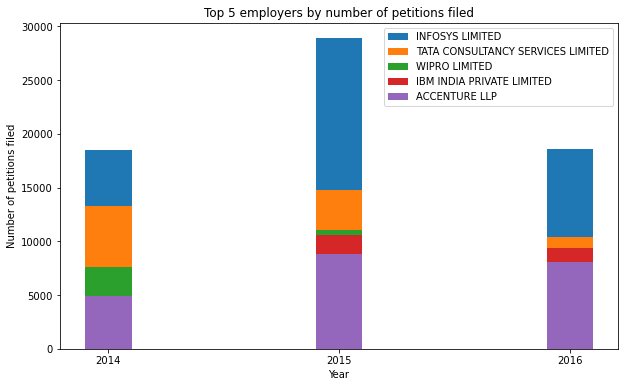

In [37]:
petitions_by_employer = result.groupby(['YEAR', 'EMP_NAME'])['ID'].count().reset_index()

# Get the top 8 employers that filed the most petitions overall
top_employers = petitions_by_employer.groupby('EMP_NAME')['ID'].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter the data to include only the top 5 employers
petitions_by_employer_top = petitions_by_employer[petitions_by_employer['EMP_NAME'].isin(top_employers)]

# Plot a bar chart of the number of petitions filed by each employer in each year
fig, ax = plt.subplots(figsize=(10, 6))

for i, employer in enumerate(top_employers):
    data = petitions_by_employer_top[petitions_by_employer_top['EMP_NAME'] == employer]
    ax.bar(data['YEAR'], data['ID'], label=employer, width=0.2, align='center', color=f'C{i}')

ax.set_xticks(result['YEAR'].unique())
ax.set_xlabel('Year')
ax.set_ylabel('Number of petitions filed')
ax.set_title('Top 5 employers by number of petitions filed')
ax.legend()

plt.show()

From the plot above, we can see that Infosys Limited and Accenture LLP are the top two companies that are filing for H1B petition. Also, we can see that Tata Consultancy Services and Wipro Limited has decreased the no. of petitions over the years while IBM India has increased.

The plot below shows the percentage based distribution of cases based on various status

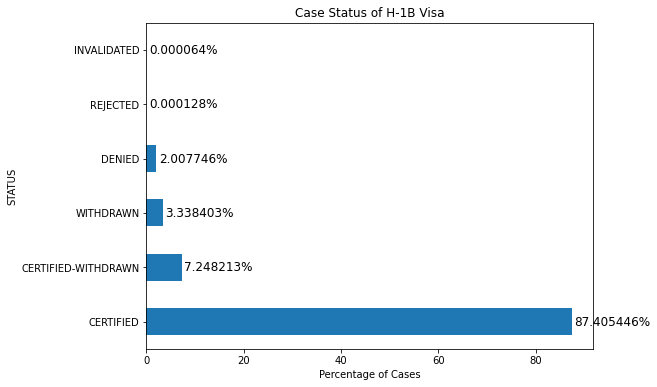

In [38]:
import matplotlib.pyplot as plt

sums = result.STATUS.groupby(result.STATUS).count()
total = sums.sum() # Calculate the total number of cases

sorted_sums = (sums/total * 100).sort_values(ascending=False) # Calculate percentage and sort

plt.figure(figsize=(8, 6))
plt.title('Case Status of H-1B Visa')
plt.ylabel('Status')
plt.xlabel('Percentage of Cases')

# Add percentage labels to the bars
for i, v in enumerate(sorted_sums):
    plt.text(v+0.5, i, f'{v:.6f}%', va='center', fontsize=12)
sorted_sums.plot(kind='barh')

plt.show()


From the plot above, we can see that more than 87% of the petitions are certified by the Department of Labor (DOL)

Correlation between WAGE_RATE_FROM and visa certification: 0.01


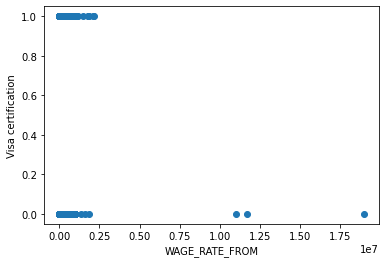

In [39]:

# Map STATUS to a binary column indicating whether the visa is certified
result['certified'] = (result['STATUS'] == 'CERTIFIED').astype(int)

# Calculate the correlation between WAGE_RATE_FROM and visa certification
correlation = result['WAGE_RATE_FROM'].corr(result['certified'])

# Print the correlation coefficient
print(f"Correlation between WAGE_RATE_FROM and visa certification: {correlation:.2f}")

# Create a scatter plot of WAGE_RATE_FROM and visa certification
plt.scatter(result['WAGE_RATE_FROM'], result['certified'])
plt.xlabel('WAGE_RATE_FROM')
plt.ylabel('Visa certification')
plt.show()


We can see that there is no significant correlation between the WAGE_RATE and the STATUS